In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data analysis projects/PowerBI/Heart attack/Medicaldataset.csv')

In [5]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [6]:
# changing values in gender, if value is 1 then male, else female

df['Gender'] = df['Gender'].apply(lambda x: 'Male' if x == 1 else 'Female')

In [7]:
df['Gender'].value_counts()

,count
Gender,
Male,870
Female,449


In [14]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Blood_sugar_category
0,64,Male,66,160,83,160.0,1.80,0.012,negative,High
1,21,Male,94,98,46,296.0,6.75,1.060,positive,High
2,55,Male,64,160,77,270.0,1.99,0.003,negative,High
3,64,Male,70,120,55,270.0,13.87,0.122,positive,High
4,55,Male,64,112,65,300.0,1.08,0.003,negative,High


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   object 
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 92.9+ KB


In [10]:
df.describe()

,Age,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [11]:
df['Result'].value_counts()

,count
Result,
positive,810
negative,509


In [12]:
# creating a new column for blood suger levels.

def categorize_blood_sugar(val):
    if val < 70:
        return 'Low'
    elif val <= 120:
        return 'Normal'
    else:
        return 'High'

df['Blood_sugar_category'] = df['Blood sugar'].apply(categorize_blood_sugar)


In [15]:
# Create age groups (e.g., <30, 30-40, 41-50, 51-60, >60) for better visualization.

def categorize_age(age):
    if age < 30:
        return '<30'
    elif age <= 40:
        return '30-40'
    elif age <= 50:
        return '41-50'
    elif age <= 60:
        return '51-60'
    else:
        return '>60'

df['Age Group'] = df['Age'].apply(categorize_age)

df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Blood_sugar_category,Age Group
0,64,Male,66,160,83,160.0,1.80,0.012,negative,High,>60
1,21,Male,94,98,46,296.0,6.75,1.060,positive,High,<30
2,55,Male,64,160,77,270.0,1.99,0.003,negative,High,51-60
3,64,Male,70,120,55,270.0,13.87,0.122,positive,High,>60
4,55,Male,64,112,65,300.0,1.08,0.003,negative,High,51-60


In [20]:
df['Blood_sugar_category'].value_counts()

,count
Blood_sugar_category,
Normal,684
High,618
Low,17


In [21]:
df['Age Group'].value_counts()

,count
Age Group,
>60,514
51-60,354
41-50,275
30-40,123
<30,53


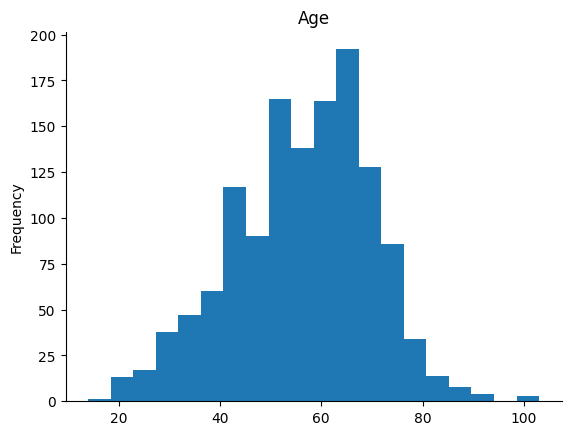

In [16]:
# Age distribution Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
from google.colab import files

# Save the dataframe to CSV
df.to_csv('cleaned_heart_attack_data.csv', index=False)

# Trigger download
files.download('cleaned_heart_attack_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

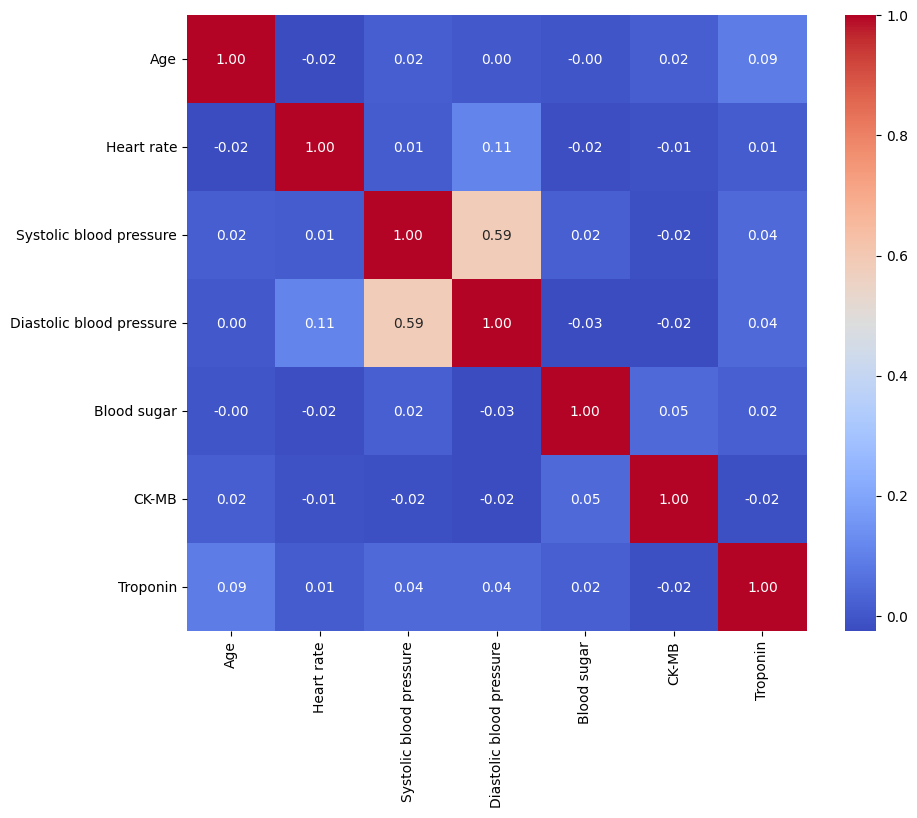

In [19]:
# HEAT MAP FOR CORRELATIONS

# selecting columns that are numbers
num_cols = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = num_cols.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")



**DATA PREPROCESSING PHASE**

In [23]:
# function that preprocesses data (changing object to numbers, using pd.getdummies for categorical values)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def preprocess_for_ridge(data, target_column, categorical_columns, test_size=0.2, random_state=42):
    """
    Preprocess data for ridge regression: encode categorical variables, split data, and standardize features.

    Parameters:
    - data (pd.DataFrame): Input dataset with features and target.
    - target_column (str): Name of the target column (continuous).
    - categorical_columns (list): List of column names for categorical features.
    - test_size (float): Proportion of data for testing (default: 0.2).
    - random_state (int): Random seed for reproducibility (default: 42).

    Returns:
    - X_train (np.array): Standardized training features.
    - X_test (np.array): Standardized testing features.
    - y_train (np.array): Training target values.
    - y_test (np.array): Testing target values.
    - preprocessor (ColumnTransformer): Fitted preprocessor for future use.
    """
    # Step 1: Split features and target
    X = data.drop(columns=[target_column])
    y = data[target_column].values

    # Step 2: Identify numerical columns
    numerical_columns = [col for col in X.columns if col not in categorical_columns]

    # Step 3: Create preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns),
            ('num', StandardScaler(), numerical_columns)
        ])

    # Step 4: Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Step 5: Apply encoding and standardization
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)

    # Step 6: Verify data format
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    return X_train, X_test, y_train, y_test, preprocessor

# calling the function
X_train, X_test, y_train, y_test, preprocessor = preprocess_for_ridge(df, 'Result', ['Gender', 'Age Group', 'Blood_sugar_category'])

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1055, 14)
(264, 14)
(1055,)
(264,)


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

# Step 7: Train logistic regression with cross-validation
# Define Cs and cv if they are not already defined in the environment
# For example:
Cs = np.logspace(-4, 4, 20) # A range of C values for cross-validation
cv = 5 # Number of cross-validation folds
random_state = 42 # Ensure reproducibility

model = LogisticRegressionCV(
    Cs=Cs, cv=cv, scoring='f1_weighted', random_state=random_state, max_iter=1000
)
model.fit(X_train, y_train)

# Get the best C (inverse of regularization strength)
best_C = model.C_[0]

# Step 8: Predict on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 9: Calculate performance metrics
train_metrics = {
    'accuracy': accuracy_score(y_train, y_train_pred),
    'precision': precision_score(y_train, y_train_pred, average='weighted', zero_division=0),
    'recall': recall_score(y_train, y_train_pred, average='weighted'),
    'f1': f1_score(y_train, y_train_pred, average='weighted')
}
test_metrics = {
    'accuracy': accuracy_score(y_test, y_test_pred),
    'precision': precision_score(y_test, y_test_pred, average='weighted', zero_division=0),
    'recall': recall_score(y_test, y_test_pred, average='weighted'),
    'f1': f1_score(y_test, y_test_pred, average='weighted')
}

# You might want to print the metrics to see the results
print("Training Metrics:", train_metrics)
print("Testing Metrics:", test_metrics)
print("Best C value from cross-validation:", best_C)

Training Metrics: {'accuracy': 0.9345971563981043, 'precision': 0.9375697913954949, 'recall': 0.9345971563981043, 'f1': 0.9350330089094399}
Testing Metrics: {'accuracy': 0.9242424242424242, 'precision': 0.9240587695133149, 'recall': 0.9242424242424242, 'f1': 0.9240946045824094}
Best C value from cross-validation: 3792.690190732246
